# Checking Tensorflow and Keras Versions

In [48]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


# Using Keras to Load the Dataset

In [49]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [50]:
X_train_full.shape

(60000, 28, 28)

In [51]:
X_train_full.dtype

dtype('uint8')

In [52]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', \
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [54]:
class_names[y_train[0]]

'Coat'

# Creating the Model using Sequential API

In [55]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.layers

In [58]:
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [61]:
model.get_layer('dense_6') is hidden1

True

In [62]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05266275, -0.01783933, -0.03613131, ..., -0.03851653,
        -0.02268941,  0.07191925],
       [-0.01669726, -0.02539321,  0.00494812, ..., -0.03106757,
         0.03878815, -0.02483042],
       [ 0.05154151,  0.05454604,  0.00032967, ..., -0.06340896,
        -0.00995042,  0.05666171],
       ...,
       [-0.02342739, -0.06977589, -0.06624911, ..., -0.05354155,
         0.04085145,  0.01993249],
       [-0.03678884, -0.05914208, -0.05309342, ...,  0.03618671,
        -0.07243792, -0.06436592],
       [ 0.02222928,  0.03737337, -0.03620669, ..., -0.05802163,
         0.00099009,  0.01015006]], dtype=float32)

In [63]:
weights.shape

(784, 300)

In [64]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [65]:
biases.shape

(300,)

# Compiling the Model

In [66]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# Training and Evaluating the Model

In [67]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7077 - accuracy: 0.7703 - val_loss: 0.5390 - val_accuracy: 0.8088
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8322 - val_loss: 0.4461 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4402 - accuracy: 0.8449 - val_loss: 0.4143 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4155 - accuracy: 0.8549 - val_loss: 0.3853 - val_accuracy: 0.8704
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3942 - accuracy: 0.8616 - val_loss: 0.3867 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3784 - accuracy: 0.8673 - val_loss: 0.3637 - val_accuracy: 0.8772
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3643 - accuracy: 0.8699 - val_loss: 0.4369 - val_accuracy:

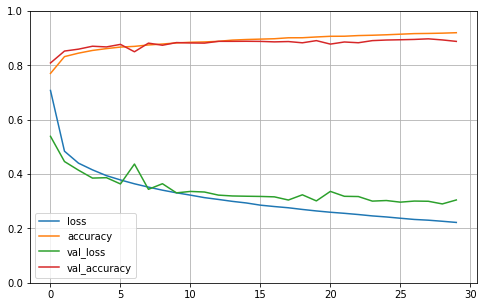

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [69]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 57.9899 - accuracy: 0.8543


[57.9898796081543, 0.8543000221252441]

# Using the Model to Make Predictions

In [70]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [76]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [72]:
import numpy as np

np.array(class_names)[y_pred]

array(['Bag', 'Pullover', 'Trouser'], dtype='<U11')

In [73]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# TensorBoard

In [74]:
import os

root_logdir = os.path.join(os.curdir, 'mylogs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [75]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid), callbacks = [tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2190 - accuracy: 0.9218 - val_loss: 0.3111 - val_accuracy: 0.8850
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2151 - accuracy: 0.9226 - val_loss: 0.2947 - val_accuracy: 0.8966
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2111 - accuracy: 0.9238 - val_loss: 0.2864 - val_accuracy: 0.8982
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2081 - accuracy: 0.9266 - val_loss: 0.2850 - val_accuracy: 0.8988
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2040 - accuracy: 0.9280 - val_loss: 0.2918 - val_accuracy: 0.8956
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2008 - accuracy: 0.9278 - val_loss: 0.2987 - val_accuracy: 0.8930
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1981 - accuracy: 0.9295 - val_loss: 0.2881 - val_accuracy:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir = ./mylogs -- port = 6006